In [21]:
import numpy as np
import matplotlib.pyplot as plt

N=100
D=2

X=np.random.randn(N,D)
ones = np.array([[1]*N]).T
XD = np.hstack((ones,X))
w= np.random.random(D+1)
z=XD.dot(w)

def sigmod(z):
    return 1/(1+np.exp(z))
print (sigmod(z))



[ 0.66058101  0.18016825  0.43123146  0.38037474  0.3592876   0.34630502
  0.43691066  0.51610472  0.51694004  0.26980402  0.22544678  0.50282857
  0.41995867  0.23274557  0.32657882  0.29319571  0.52104615  0.20477351
  0.36352515  0.57495752  0.56270296  0.54061393  0.21174322  0.46604949
  0.55914545  0.43842678  0.34076632  0.6133428   0.74456869  0.24413309
  0.51994276  0.40421486  0.56185615  0.48333657  0.36938788  0.43295245
  0.23567865  0.39864611  0.44564846  0.30871438  0.52821235  0.66495846
  0.32832041  0.63876222  0.77776734  0.63268721  0.47696678  0.66713717
  0.49342576  0.4353894   0.61004441  0.44276196  0.23849655  0.36817441
  0.50703963  0.2855409   0.42848588  0.30106318  0.4939069   0.61561223
  0.25001008  0.56518842  0.33662781  0.3715328   0.40546487  0.39940032
  0.36123121  0.53978087  0.26469412  0.56021883  0.57714874  0.64399596
  0.2151412   0.48473286  0.52498765  0.30797726  0.41328262  0.7364482
  0.43534103  0.52897626  0.22690101  0.34782416  0.

In [53]:
import numpy as np
import pandas as pd

def get_data():
    df = pd.read_csv('/home/hmohan/Desktop/ML/ecommerce_data.csv')
    data = df.as_matrix()
    
    X=data[:,:-1]
    Y = data[:,-1]
    X[:,1] = X[:,1]-np.mean(X[:,1])/np.std(X[:,1])
    X[:,2] = X[:,2]-np.mean(X[:,2])/np.std(X[:,2])
    N,D = X.shape
    X2 = np.zeros((N,D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1]=1
    Z = np.zeros((N,4))
    Z[np.arange(N),X[:,D-1].astype(np.int32)]=1
    assert (np.abs(X2[:,-4:]-Z).sum() < 10e-10)
    return X2,Y
def get_binary_data():
    X,Y = get_data()
    X2 = X[Y<=1]
    Y2 = Y[Y<=1]
    return X2,Y2


In [56]:
import numpy as np
X,Y = get_binary_data()
X.shape[1]

8

In [1]:
## cross error entrophy 

import numpy as np

N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T, Y))

# try it with our closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

# calculate the cross-entropy error
print(cross_entropy(T, Y))

56.0354675889
2.90831220809


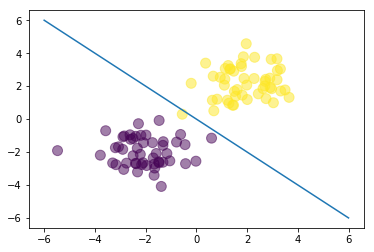

In [18]:
## visualization

import numpy as np
import matplotlib.pyplot as plt

N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# get the closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

plt.scatter(X[:,0], X[:,1],c=T,s=100,alpha=0.5)

x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()